==========================================================================
# 📁 **ATIVIDADE FIAP - Enterprise Challenge - Sprint 3 - Ingredion**
==========================================================================

**Autor.....:** Diego Nunes Veiga

**RM........:** 560658

**Turma...:** Graduação - 1TIAOR

**Data......:** 25/05/2025

==========================================================================


In [2]:
# Importação das bibliotecas
import warnings
import os
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.cluster import KMeans, DBSCAN

## ↪ **Pré-processamento dos dados**

In [3]:
# --- Subalgoritimo de leitura de arquivo ---

def LeituraArquivo (arquivo):

  try:
    # Detecta o tipo de extensão do arquivo
    extensao = os.path.splitext(arquivo)[1].lower()

    # Validação do tipo de arquivo
    if extensao == '.csv':
      df = pd.read_csv(arquivo)

    elif extensao == '.xlsx':
      df = pd.read_excel(arquivo, skiprows=3, header= 0)

    else:
      raise ValueError("Extensão de arquivo {} não suportada!".format(extensao))

    # Confirmação de leitura dos dados
    print("Arquivo {} carregado com sucesso".format(arquivo))
    return df

  except Exception as e:

    print("Erro ao carregar {}: {}".format(arquivo,e))
    return None

In [4]:
# --- Leitura dos Dados de Entrada ---

ndvi = LeituraArquivo('satveg_planilha.xlsx')
producao2023 = LeituraArquivo('Produção 2023 - Sao Paulo.xlsx')
producao2022 = LeituraArquivo('Produção 2022 - Sao Paulo.xlsx')
producao2021 = LeituraArquivo('Produção 2021 - Sao Paulo.xlsx')

Arquivo satveg_planilha.xlsx carregado com sucesso
Arquivo Produção 2023 - Sao Paulo.xlsx carregado com sucesso
Arquivo Produção 2022 - Sao Paulo.xlsx carregado com sucesso
Arquivo Produção 2021 - Sao Paulo.xlsx carregado com sucesso


### **NDVI**

In [5]:
# NDVI

print("="*15 + "NVDI" + "="*15 +"\n")
ndvi.info()
print('\n')
ndvi.head()

===============NVDI===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    575 non-null    object 
 1   NDVI    575 non-null    float64
 2   QA      575 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.6+ KB




,Data,NDVI,QA
0,18/02/2000,0.6137,3
1,05/03/2000,0.5681,0
2,21/03/2000,0.5390,0
3,06/04/2000,0.4976,0
4,22/04/2000,0.4395,0


In [6]:
# Verificar a presença de dados duplicados

duplicates = ndvi.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


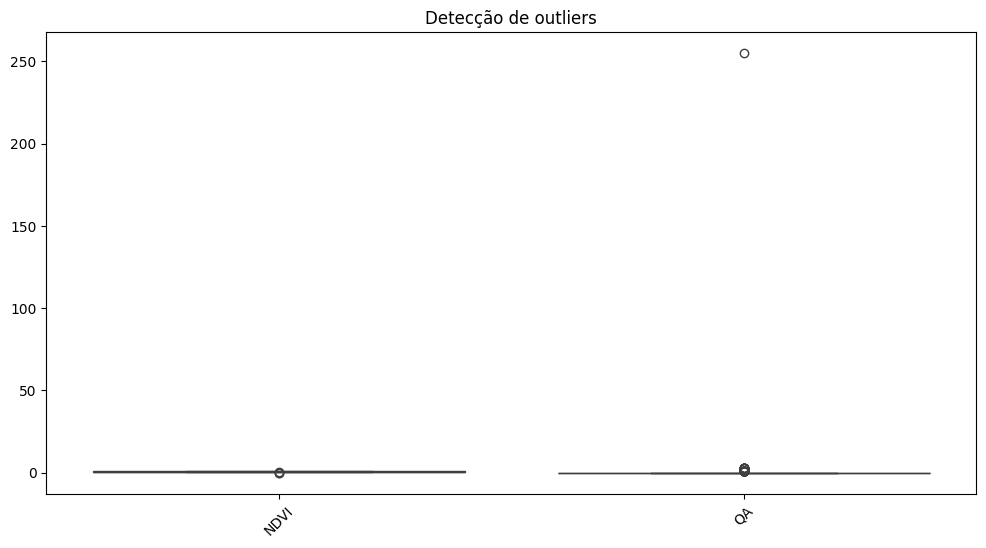

In [7]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=ndvi)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

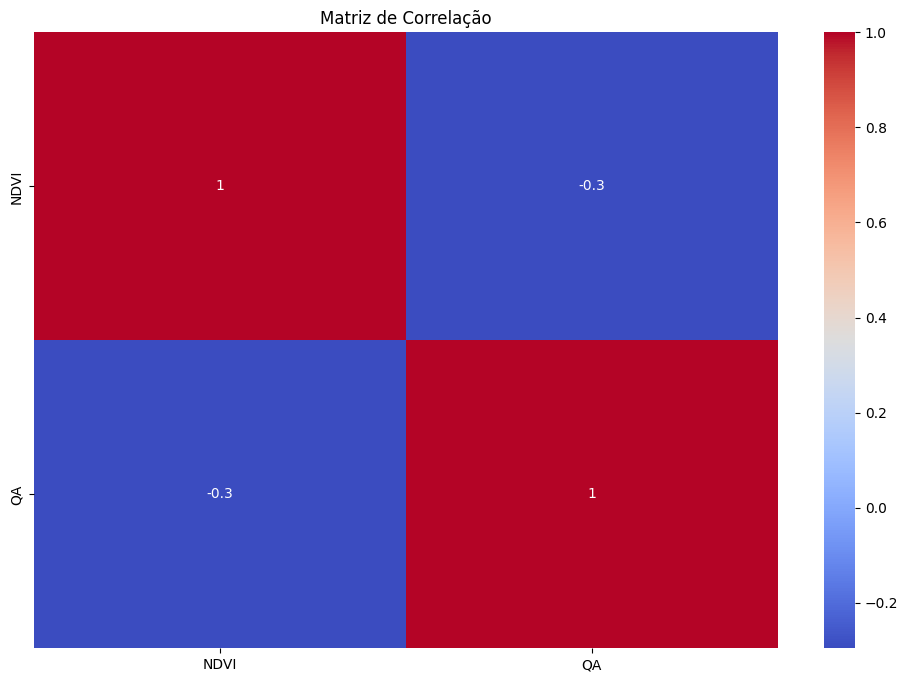

In [8]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(ndvi.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

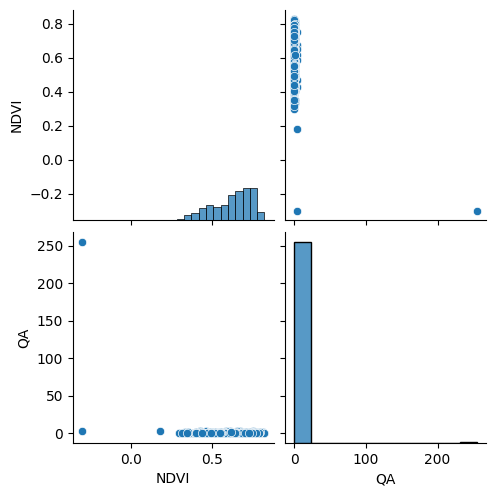

In [9]:
# Apresentação do relacionamento de todos os dados

sns.pairplot(ndvi)
plt.show()

### **Produção 2023**

In [10]:
# Produção de 2023

print("="*15 + "Produção 2023" + "="*15 +"\n")
producao2023.info()
print('\n')
producao2023.head()


===============Produção 2023===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   UF, Mesorregião, Microrregião e Município, em ordem de código de Meso e Micro, e nome de Município - SP  725 non-null    object
 1   Variável                                                                                                 725 non-null    object
 2   Unnamed: 2                                                                                               725 non-null    object
 3   Unnamed: 3                                                                                               725 non-null    object
 4   Unnamed: 4                                      

,"UF, Mesorregião, Microrregião e Município, em ordem de código de Meso e Micro, e nome de Município - SP",Variável,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,Área plantada (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por ...,Valor da produção (Mil Reais)
1,São Paulo,5496459,5484192,439098082,80066,56729446
2,São José do Rio Preto,1026753,1026753,87828026,85540,11475878
3,Jales,65742,65742,5656260,86037,725117
4,Aparecida d'Oeste,1320,1320,112200,85000,13961


In [11]:
# Exemplo: mudar apenas o nome das colunas manualmente

producao2023 = producao2023.rename(columns={
    'UF, Mesorregião, Microrregião e Município, em ordem de código de Meso e Micro, e nome de Município - SP' : 'Município',
    'Variável': 'Área colheita (ha)',
    'Unnamed: 2': ' Área colhida (ha)',
    'Unnamed: 3': 'Quantidade produzida (ton)',
    'Unnamed: 4': 'Rendimento médio (kg/ha)',
    'Unnamed: 5': 'Valor (Mil Reais)'
})


In [12]:
# Retira primeira linha dos Dataframes

producao2023 = producao2023.drop(index=0).reset_index(drop=True)

In [13]:
# Escolha das colunas que seram trocadas os tipos de dados

colunas_para_converter = ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']


# Aplicar conversão dos tipos de dados

for coluna in colunas_para_converter:
    producao2023[coluna] = pd.to_numeric(producao2023[coluna], errors='coerce')

In [14]:
# Apresentação dos novo frame de Produção de 2023

print("="*15 + "Produção 2023" + "="*15 +"\n")
producao2023.info()
print('\n')
producao2023.head()

===============Produção 2023===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Município                   725 non-null    object 
 1   Área colheita (ha)          583 non-null    float64
 2    Área colhida (ha)          583 non-null    float64
 3   Quantidade produzida (ton)  583 non-null    float64
 4   Rendimento médio (kg/ha)    583 non-null    float64
 5   Valor (Mil Reais)           581 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.1+ KB




,Município,Área colheita (ha),Área colhida (ha),Quantidade produzida (ton),Rendimento médio (kg/ha),Valor (Mil Reais)
0,São Paulo,5496459.0,5484192.0,439098082.0,80066.0,56729446.0
1,São José do Rio Preto,1026753.0,1026753.0,87828026.0,85540.0,11475878.0
2,Jales,65742.0,65742.0,5656260.0,86037.0,725117.0
3,Aparecida d'Oeste,1320.0,1320.0,112200.0,85000.0,13961.0
4,Aspásia,1200.0,1200.0,94500.0,78750.0,12276.0


In [15]:
# Verificar a presença de dados duplicados

duplicates = producao2023.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


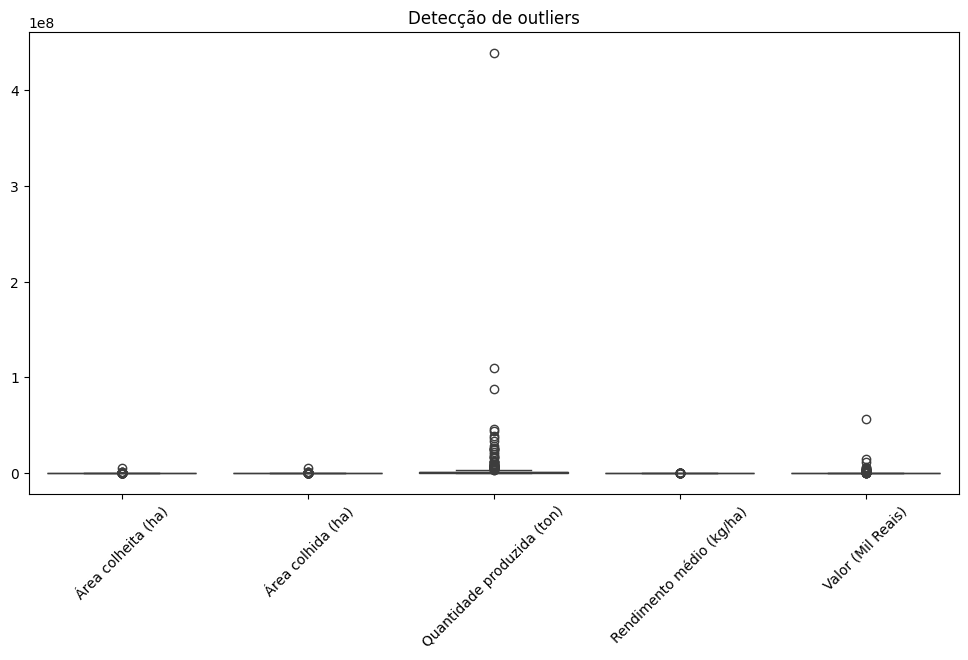

In [16]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=producao2023.select_dtypes(include='number'))
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

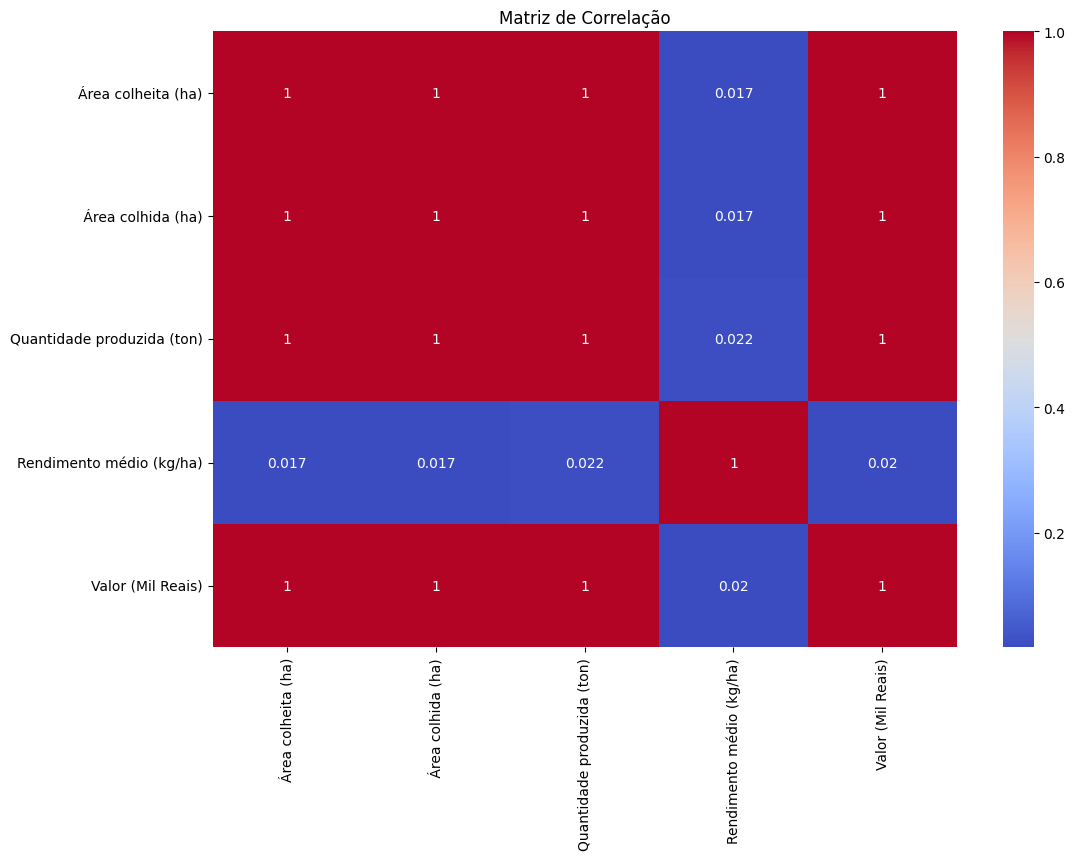

In [17]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(producao2023.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

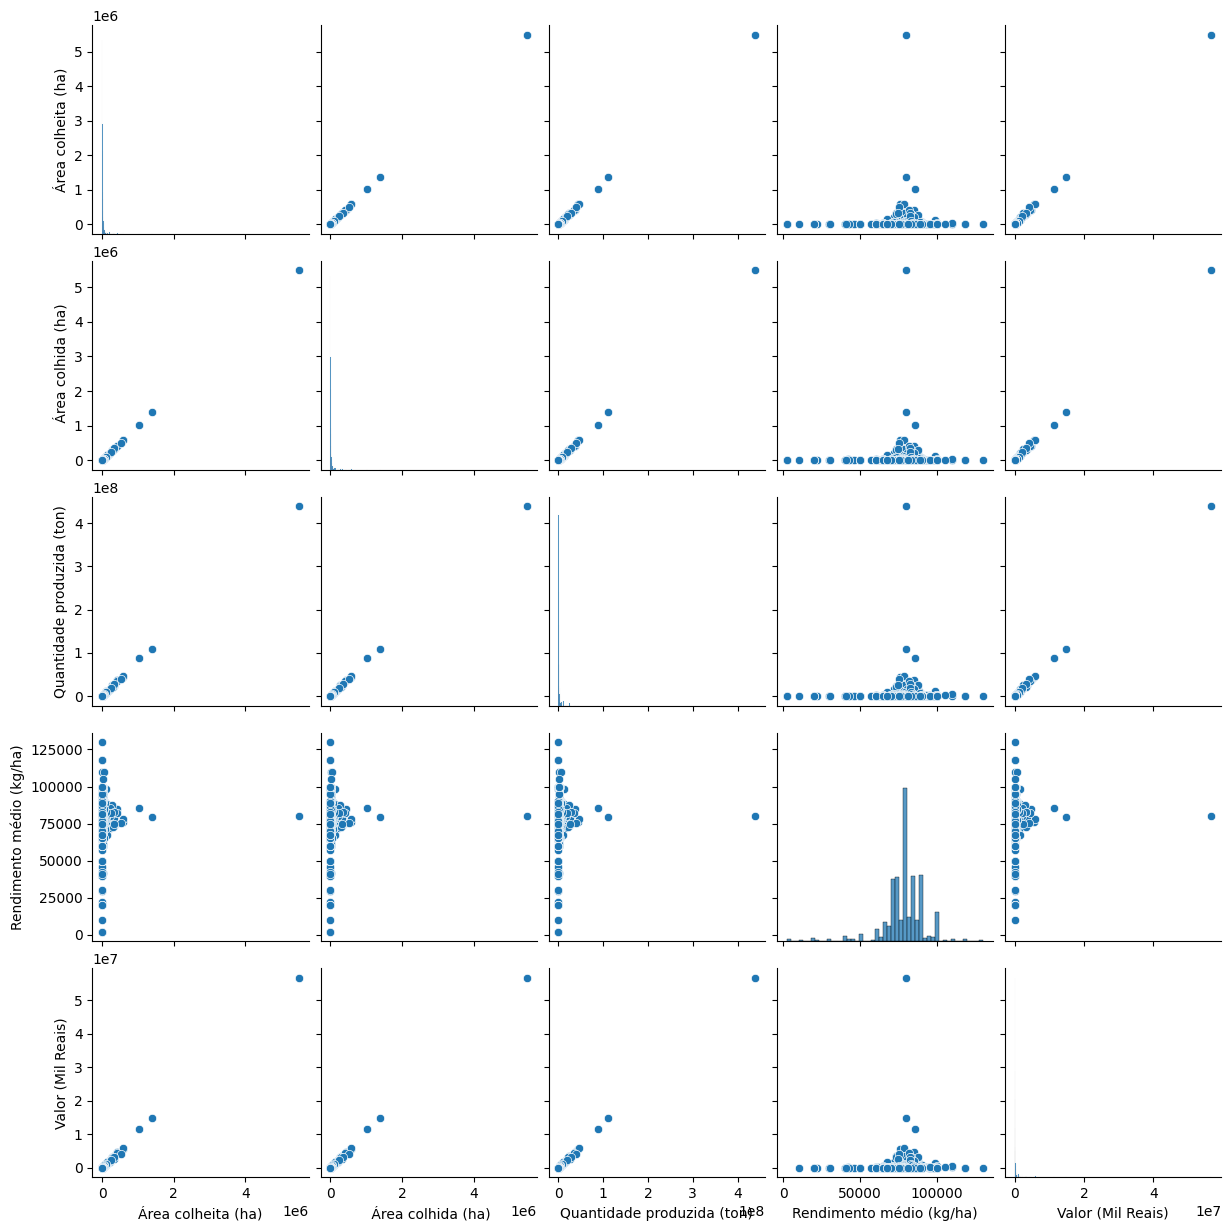

In [18]:
# Apresentação do relacionamento de todos os dados

sns.pairplot(producao2023)
plt.show()

### **Produção 2022**

In [19]:
# Exemplo: mudar apenas o nome das colunas manualmente

producao2022 = producao2022.rename(columns={
    'UF, Mesorregião, Microrregião e Município, em ordem de código de Meso e Micro, e nome de Município - SP' : 'Município',
    'Variável': 'Área colheita (ha)',
    'Unnamed: 2': ' Área colhida (ha)',
    'Unnamed: 3': 'Quantidade produzida (ton)',
    'Unnamed: 4': 'Rendimento médio (kg/ha)',
    'Unnamed: 5': 'Valor (Mil Reais)'
})


In [20]:
# Retira primeira linha dos Dataframes

producao2022 = producao2022.drop(index=0).reset_index(drop=True)

In [21]:
# Escolha das colunas que seram trocadas os tipos de dados

colunas_para_converter = ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']


# Aplicar conversão dos tipos de dados

for coluna in colunas_para_converter:
    producao2022[coluna] = pd.to_numeric(producao2022[coluna], errors='coerce')

In [22]:
# Verificar a presença de dados duplicados

duplicates = producao2022.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


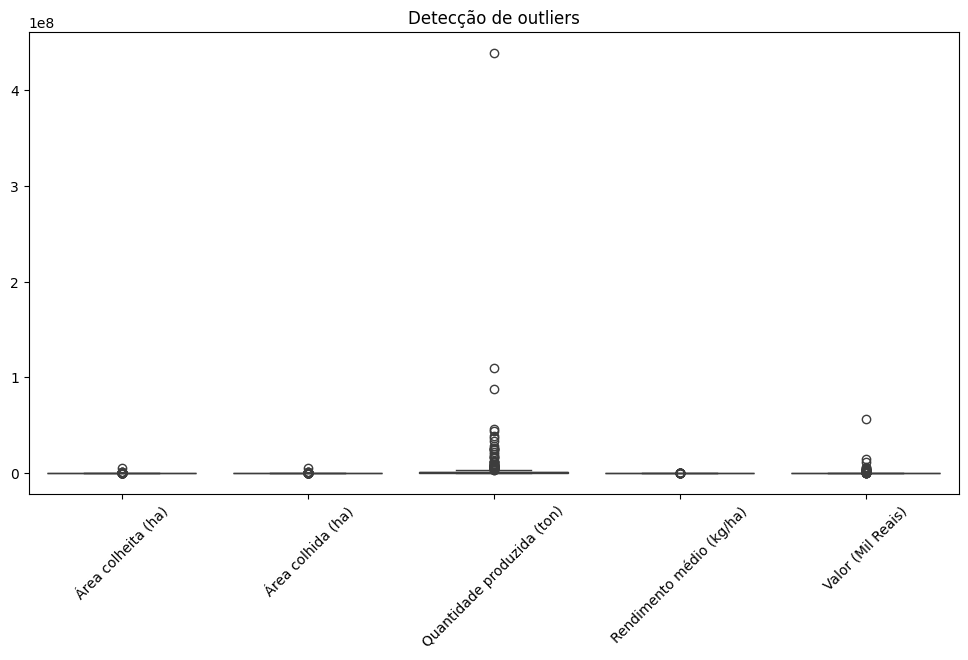

In [23]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=producao2023.select_dtypes(include='number'))
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

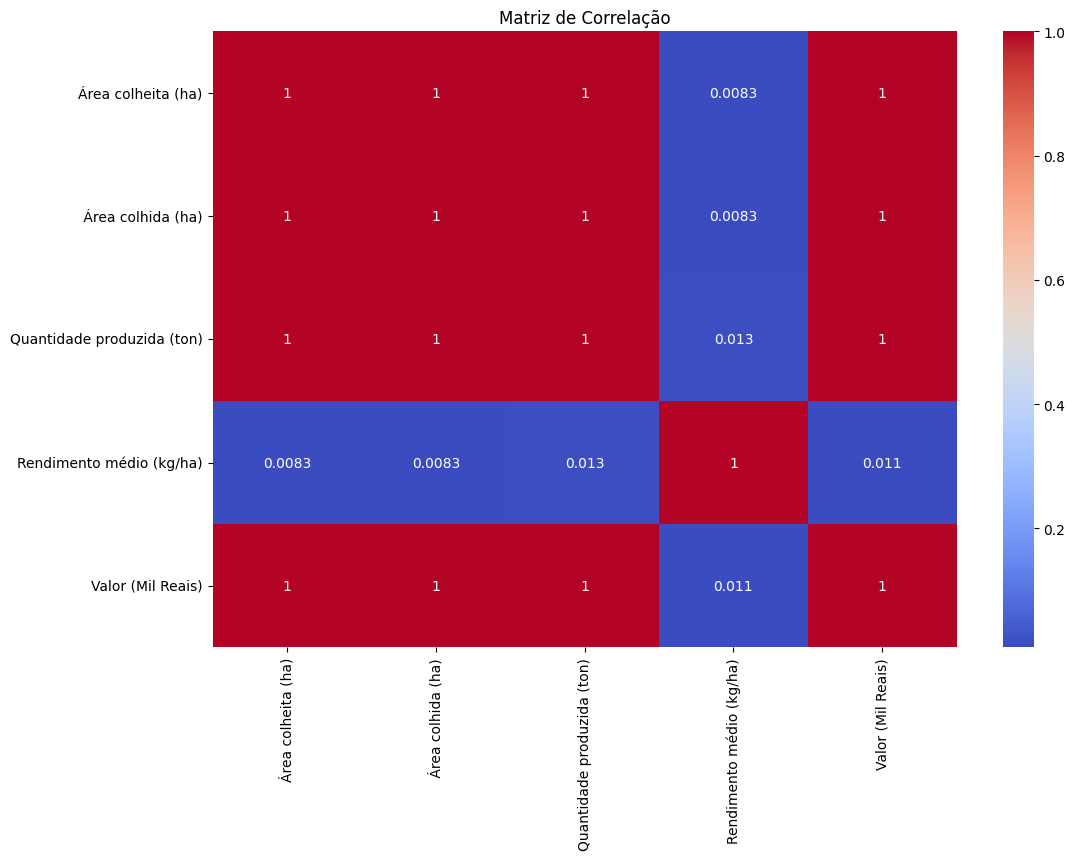

In [24]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(producao2022.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

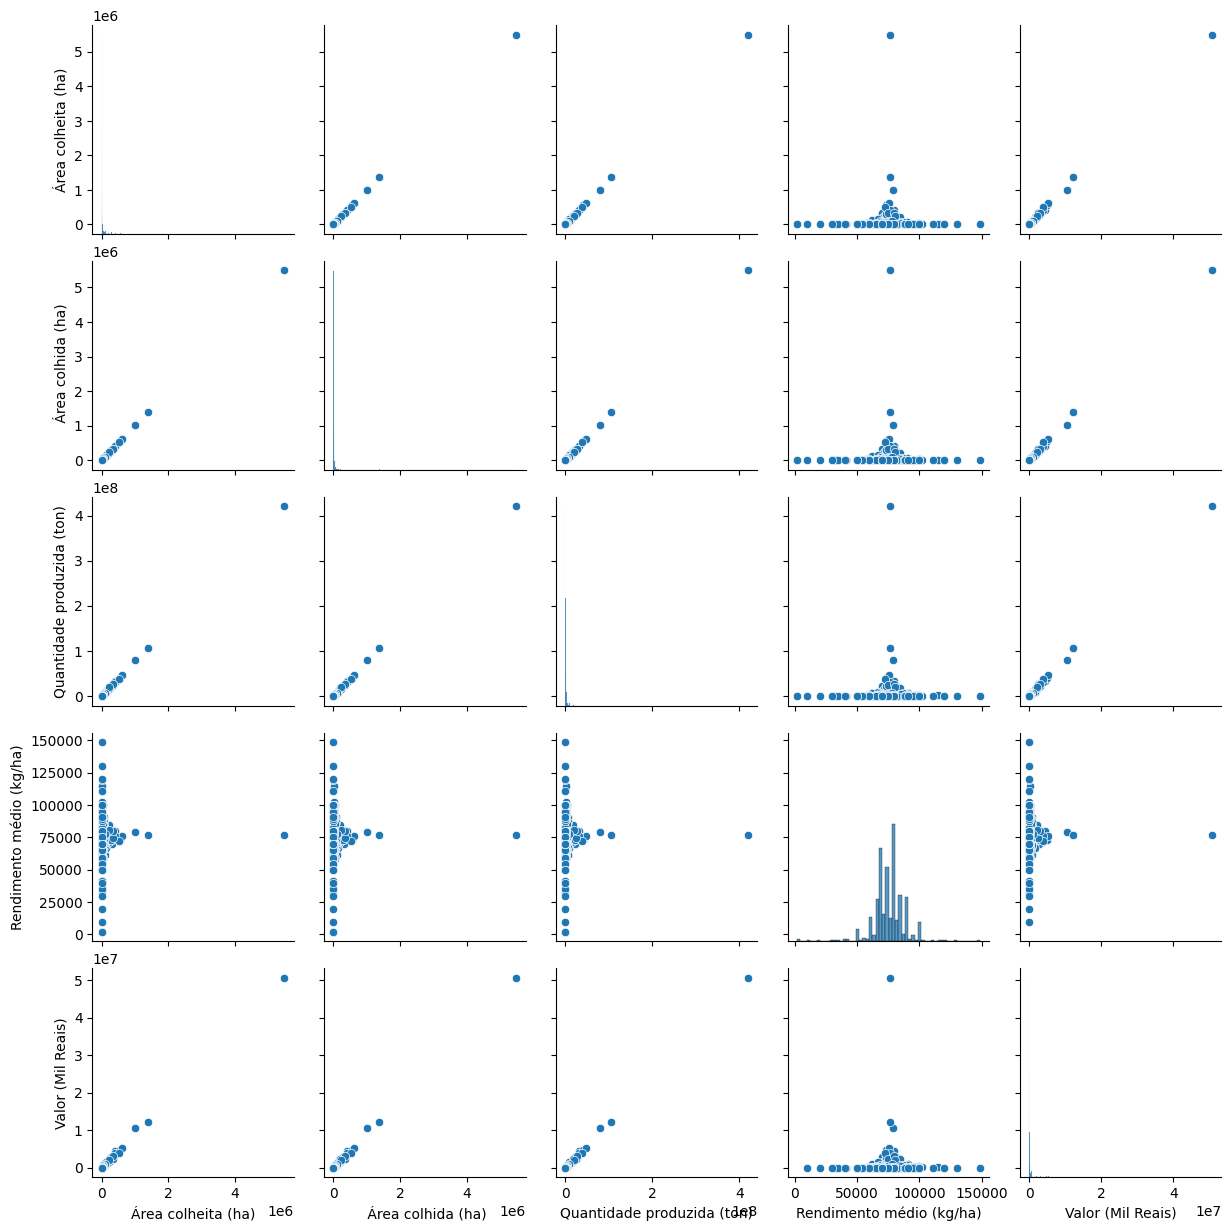

In [25]:
# Apresentação do relacionamento de todos os dados

sns.pairplot(producao2022)
plt.show()

### **Produção 2021**

In [26]:
# Exemplo: mudar apenas o nome das colunas manualmente

producao2021 = producao2021.rename(columns={
    'UF, Mesorregião, Microrregião e Município, em ordem de código de Meso e Micro, e nome de Município - SP' : 'Município',
    'Variável': 'Área colheita (ha)',
    'Unnamed: 2': ' Área colhida (ha)',
    'Unnamed: 3': 'Quantidade produzida (ton)',
    'Unnamed: 4': 'Rendimento médio (kg/ha)',
    'Unnamed: 5': 'Valor (Mil Reais)'
})


In [27]:
# Retira primeira linha dos Dataframes

producao2021 = producao2021.drop(index=0).reset_index(drop=True)

In [28]:
# Escolha das colunas que seram trocadas os tipos de dados

colunas_para_converter = ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']


# Aplicar conversão dos tipos de dados

for coluna in colunas_para_converter:
    producao2021[coluna] = pd.to_numeric(producao2021[coluna], errors='coerce')

In [29]:
# Verificar a presença de dados duplicados

duplicates = producao2021.duplicated().sum()
print("Número de dados duplicados:", duplicates)

Número de dados duplicados: 0


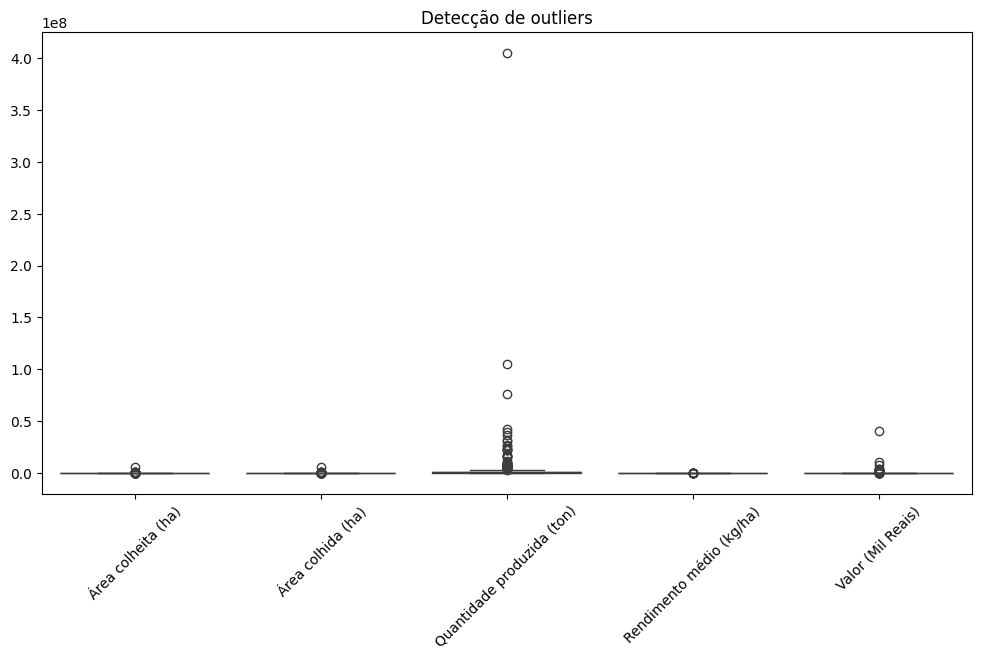

In [30]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=producao2021.select_dtypes(include='number'))
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

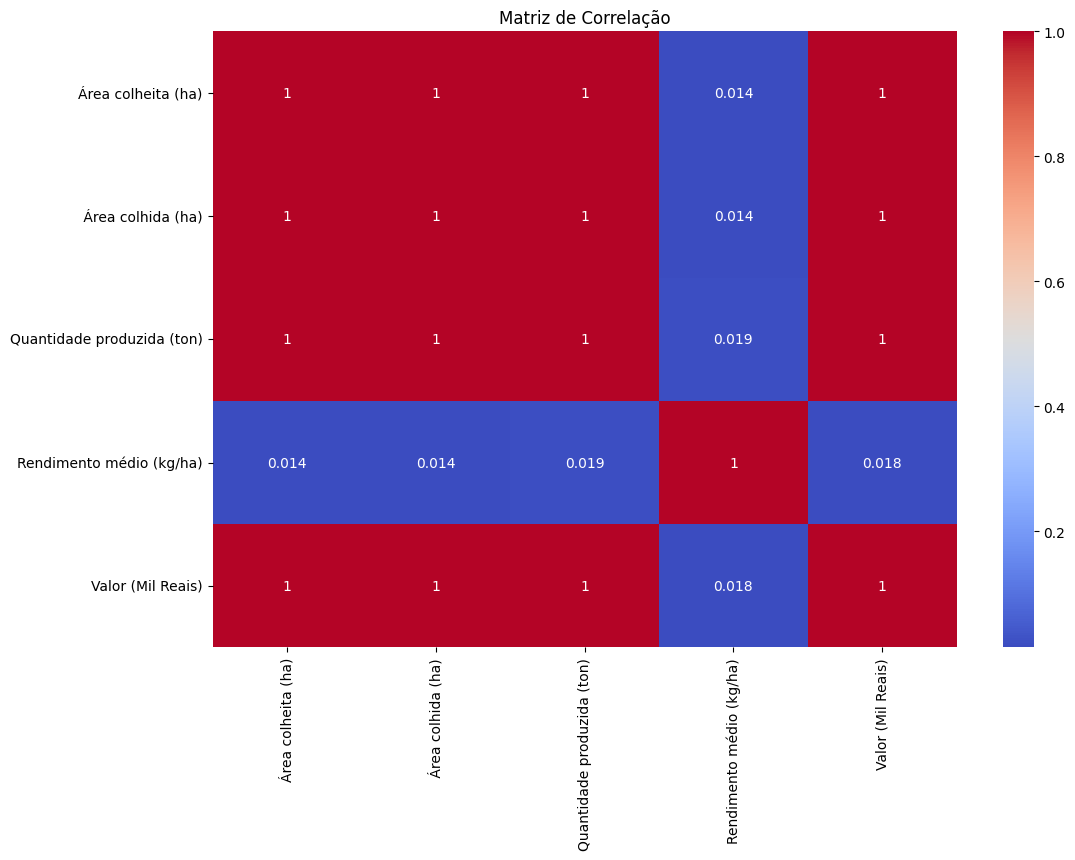

In [31]:
# Apresentação da matriz de correção

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(producao2021.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

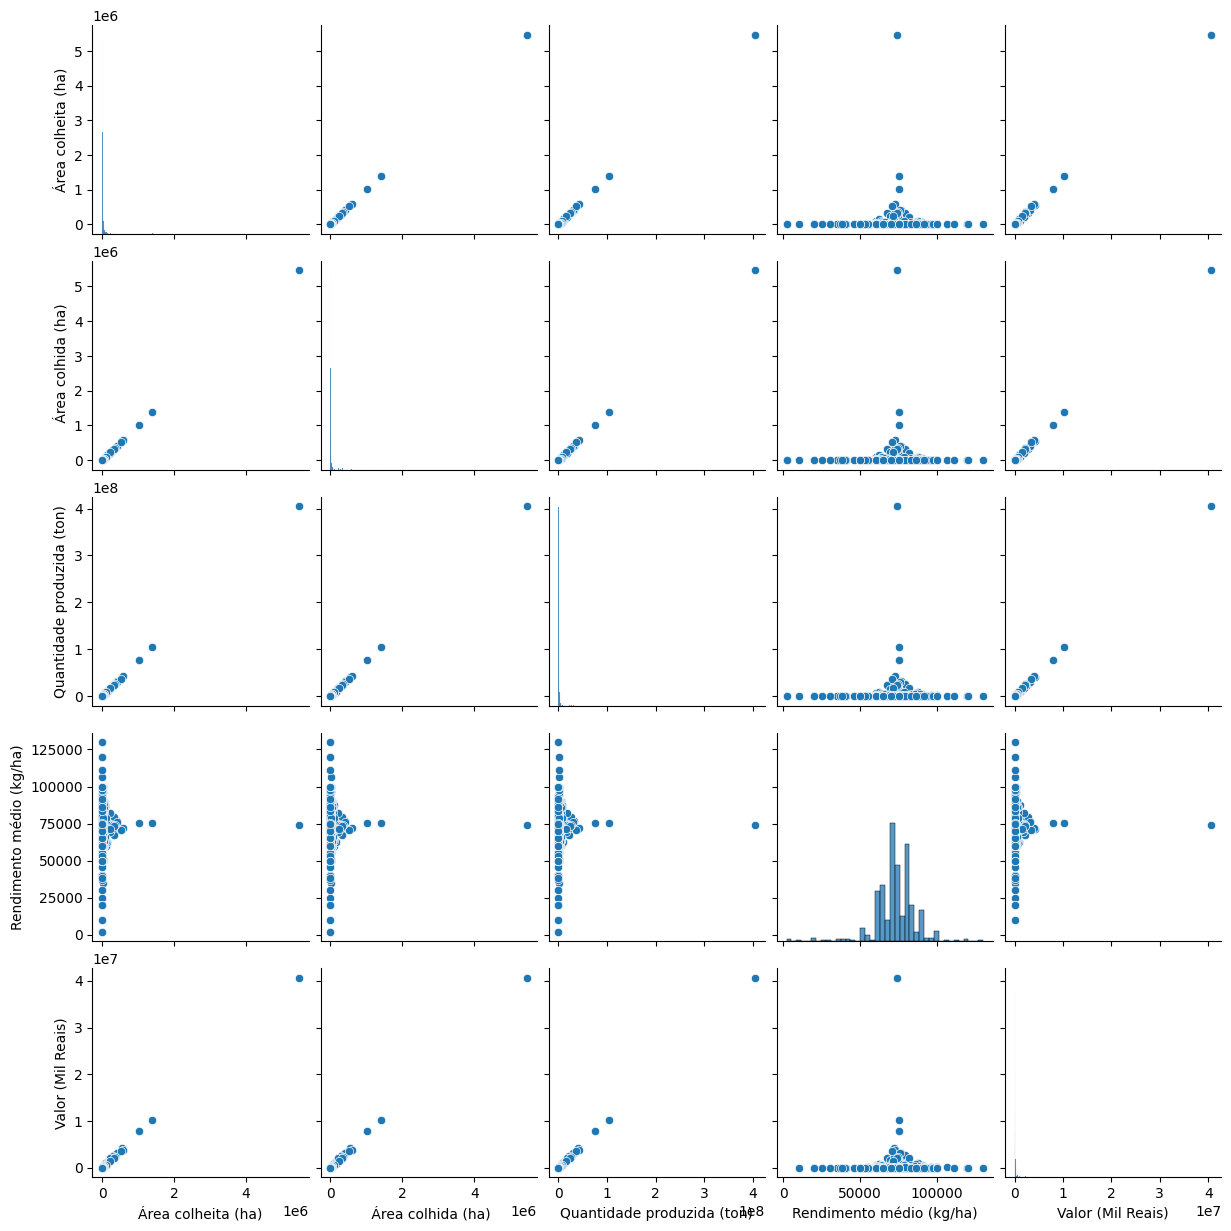

In [32]:
# Apresentação do relacionamento de todos os dados

sns.pairplot(producao2021)
plt.show()

## ↪ **Extração de Informações Relevantes**

### **NDVI**

In [33]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ["NDVI", "QA"]:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = ndvi[coluna].quantile(0.25)
        Q3 = ndvi[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = ndvi[(ndvi[coluna] < limite_inferior) | (ndvi[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = ndvi[coluna].median()
            ndvi[coluna] = ndvi[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
ndvi.shape

Coluna 'NDVI' possuia 3 outliers.
Coluna 'QA' possuia 80 outliers.


(575, 3)

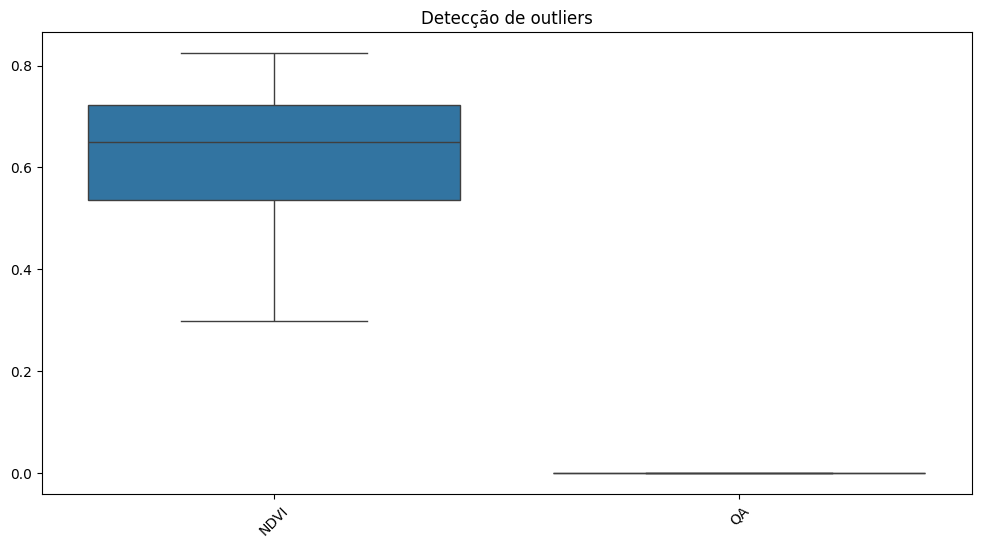

In [34]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=ndvi)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Converter a coluna 'Data' para datetime
ndvi['Data'] = pd.to_datetime(ndvi['Data'], dayfirst=True)

# Cria as colunas separadas para Ano e Mês
ndvi['Ano'] = ndvi['Data'].dt.year
ndvi['Mes'] = ndvi['Data'].dt.month

# Remover a coluna original 'Data'
ndvi = ndvi.drop(columns=['Data'])


In [36]:
# NDVI

print("="*15 + "NVDI" + "="*15 +"\n")
ndvi.info()
print('\n')
ndvi.head()

===============NVDI===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    575 non-null    float64
 1   QA      575 non-null    float64
 2   Ano     575 non-null    int32  
 3   Mes     575 non-null    int32  
dtypes: float64(2), int32(2)
memory usage: 13.6 KB




,NDVI,QA,Ano,Mes
0,0.6137,0.0,2000,2
1,0.5681,0.0,2000,3
2,0.5390,0.0,2000,3
3,0.4976,0.0,2000,4
4,0.4395,0.0,2000,4


### **Produção 2023**

In [37]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = producao2023[coluna].quantile(0.25)
        Q3 = producao2023[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = producao2023[(producao2023[coluna] < limite_inferior) | (producao2023[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = producao2023[coluna].median()
            producao2023[coluna] = producao2023[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
producao2023.shape

Coluna 'Área colheita (ha)' possuia 62 outliers.
Coluna ' Área colhida (ha)' possuia 61 outliers.
Coluna 'Quantidade produzida (ton)' possuia 59 outliers.
Coluna 'Rendimento médio (kg/ha)' possuia 32 outliers.
Coluna 'Valor (Mil Reais)' possuia 61 outliers.


(725, 6)

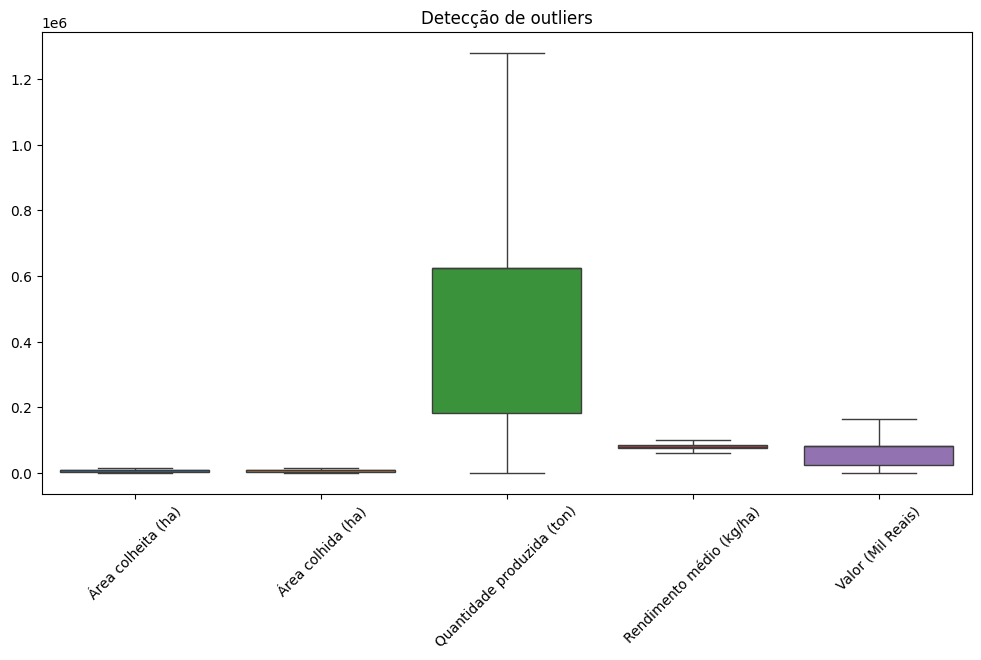

In [38]:
# Verificar a presença de outliers a partir da apresentação do Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=producao2023)
plt.title("Detecção de outliers")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Remover as colunas originais:

#  Área colhida (ha)
producao2023 = producao2023.drop(columns=[' Área colhida (ha)'])

# Quantidade produzida (ton)
producao2023 = producao2023.drop(columns=['Quantidade produzida (ton)'])

# Valor (Mil Reais)
producao2023 = producao2023.drop(columns=['Valor (Mil Reais)'])

In [40]:
# Municipios próximos de cidade de bebedouro
municipios_bebedouro = ['Bebedouro','Cajobi','Catanduva','Monte Azul Paulista','Palmares Paulista','Pirangi','Severínia','Taiaçu','Taiúva','Vista Alegre do Alto']

# Filtrar apenas os municípios da microrregião de Bebedouro
producao2023['Município'] = producao2023['Município'].str.strip().str.title()
producao2023_bebedouro = producao2023[producao2023['Município'].isin(municipios_bebedouro)].copy()

# Visualizar os dados filtrados
display(producao2023_bebedouro.head())

,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7900.0,87900.0
80,Cajobi,7854.0,100000.0
81,Catanduva,15423.0,90000.0
86,Palmares Paulista,6552.0,80000.0
90,Severínia,7300.0,85000.0


In [41]:
# Produção de 2023

print("="*15 + "Produção 2023" + "="*15 +"\n")
producao2023_bebedouro.info()
print('\n')
producao2023_bebedouro.head()

===============Produção 2023===============

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 78 to 163
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Município                 10 non-null     object 
 1   Área colheita (ha)        10 non-null     float64
 2   Rendimento médio (kg/ha)  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes




,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7900.0,87900.0
80,Cajobi,7854.0,100000.0
81,Catanduva,15423.0,90000.0
86,Palmares Paulista,6552.0,80000.0
90,Severínia,7300.0,85000.0


### **Produção 2022**

In [42]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = producao2022[coluna].quantile(0.25)
        Q3 = producao2022[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = producao2022[(producao2022[coluna] < limite_inferior) | (producao2022[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = producao2022[coluna].median()
            producao2022[coluna] = producao2022[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
producao2022.shape

Coluna 'Área colheita (ha)' possuia 62 outliers.
Coluna ' Área colhida (ha)' possuia 61 outliers.
Coluna 'Quantidade produzida (ton)' possuia 55 outliers.
Coluna 'Rendimento médio (kg/ha)' possuia 50 outliers.
Coluna 'Valor (Mil Reais)' possuia 57 outliers.


(725, 6)

In [43]:
# Remover as colunas originais:

#  Área colhida (ha)
producao2022 = producao2022.drop(columns=[' Área colhida (ha)'])

# Quantidade produzida (ton)
producao2022 = producao2022.drop(columns=['Quantidade produzida (ton)'])

# Valor (Mil Reais)
producao2022 = producao2022.drop(columns=['Valor (Mil Reais)'])

In [44]:
# Municipios próximos de cidade de bebedouro
municipios_bebedouro = ['Bebedouro','Cajobi','Catanduva','Monte Azul Paulista','Palmares Paulista','Pirangi','Severínia','Taiaçu','Taiúva','Vista Alegre do Alto']

# Filtrar apenas os municípios da microrregião de Bebedouro
producao2022['Município'] = producao2022['Município'].str.strip().str.title()
producao2022_bebedouro = producao2022[producao2022['Município'].isin(municipios_bebedouro)].copy()

# Visualizar os dados filtrados
display(producao2022_bebedouro.head())

,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7500.0,77900.0
80,Cajobi,7854.0,91000.0
81,Catanduva,15423.0,75000.0
86,Palmares Paulista,6552.0,77000.0
90,Severínia,6900.0,70000.0


In [45]:
# Produção de 2022

print("="*15 + "Produção 2022" + "="*15 +"\n")
producao2022_bebedouro.info()
print('\n')
producao2022_bebedouro.head()

===============Produção 2022===============

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 78 to 163
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Município                 10 non-null     object 
 1   Área colheita (ha)        10 non-null     float64
 2   Rendimento médio (kg/ha)  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes




,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7500.0,77900.0
80,Cajobi,7854.0,91000.0
81,Catanduva,15423.0,75000.0
86,Palmares Paulista,6552.0,77000.0
90,Severínia,6900.0,70000.0


### **Produção 2021**

In [46]:
# Realiza o comando para retirar todos os outliers

outlier_counts = {}

for coluna in ['Área colheita (ha)', ' Área colhida (ha)', 'Quantidade produzida (ton)', 'Rendimento médio (kg/ha)', 'Valor (Mil Reais)']:

    ExibeValor = True

    while True:

        # Calcular os limites do IQR
        Q1 = producao2021[coluna].quantile(0.25)
        Q3 = producao2021[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Contar os outliers da coluna atual
        outliers = producao2021[(producao2021[coluna] < limite_inferior) | (producao2021[coluna] > limite_superior)]
        num_outliers = len(outliers)

        # Coleta dados da qauntidade inicial de outliers
        if ExibeValor == True:
          outlier_counts[coluna] = len(outliers)
          ExibeValor = False

        # Verificar se ainda existem outliers
        if num_outliers == 0:
            break
        else:
            # Substituir os outliers pela mediana
            mediana = producao2021[coluna].median()
            producao2021[coluna] = producao2021[coluna].apply(lambda x: mediana if x < limite_inferior or x > limite_superior else x)

# Exibir a quantidade de outliers para cada coluna
for coluna, count in outlier_counts.items():
    print(f"Coluna '{coluna}' possuia {count} outliers.")

# formatar o banco de dados
producao2021.shape

Coluna 'Área colheita (ha)' possuia 61 outliers.
Coluna ' Área colhida (ha)' possuia 60 outliers.
Coluna 'Quantidade produzida (ton)' possuia 56 outliers.
Coluna 'Rendimento médio (kg/ha)' possuia 19 outliers.
Coluna 'Valor (Mil Reais)' possuia 61 outliers.


(725, 6)

In [47]:
# Remover as colunas originais:

#  Área colhida (ha)
producao2021 = producao2021.drop(columns=[' Área colhida (ha)'])

# Quantidade produzida (ton)
producao2021 = producao2021.drop(columns=['Quantidade produzida (ton)'])

# Valor (Mil Reais)
producao2021 = producao2021.drop(columns=['Valor (Mil Reais)'])

In [48]:
# Municipios próximos de cidade de bebedouro
municipios_bebedouro = ['Bebedouro','Cajobi','Catanduva','Monte Azul Paulista','Palmares Paulista','Pirangi','Severínia','Taiaçu','Taiúva','Vista Alegre do Alto']

# Filtrar apenas os municípios da microrregião de Bebedouro
producao2021['Município'] = producao2021['Município'].str.strip().str.title()
producao2021_bebedouro = producao2021[producao2021['Município'].isin(municipios_bebedouro)].copy()

# Visualizar os dados filtrados
display(producao2021_bebedouro.head())

,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7310.0,72534.0
80,Cajobi,7854.0,70000.0
81,Catanduva,7310.0,65000.0
86,Palmares Paulista,3300.0,70000.0
90,Severínia,6900.0,70000.0


In [49]:
# Produção de 2021

print("="*15 + "Produção 2021" + "="*15 +"\n")
producao2021_bebedouro.info()
print('\n')
producao2021_bebedouro.head()

===============Produção 2021===============

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 78 to 163
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Município                 10 non-null     object 
 1   Área colheita (ha)        10 non-null     float64
 2   Rendimento médio (kg/ha)  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes




,Município,Área colheita (ha),Rendimento médio (kg/ha)
78,Catanduva,7310.0,72534.0
80,Cajobi,7854.0,70000.0
81,Catanduva,7310.0,65000.0
86,Palmares Paulista,3300.0,70000.0
90,Severínia,6900.0,70000.0


### **Junção de todas as tabelas**

In [50]:
# 1. Filtrar NDVI entre 2021 e 2023
ndvi_filtrado = ndvi[ndvi['Ano'].between(2021, 2023)]

In [51]:
# Adicionar coluna 'Ano' antes de renomear
producao2021_bebedouro['Ano'] = 2021
producao2022_bebedouro['Ano'] = 2022
producao2023_bebedouro['Ano'] = 2023

In [52]:
# Concatenar todos os anos em um único DataFrame
producao_total = pd.concat([producao2021_bebedouro, producao2022_bebedouro, producao2023_bebedouro], ignore_index=True)

In [53]:
# Criar uma base cruzada: para cada município e ano, replicar para todos os meses daquele ano

#   Primeiro, extrair NDVI agrupado por ano/mês
ndvi_mensal = ndvi_filtrado.groupby(['Ano', 'Mes'])['NDVI'].mean().reset_index()

#   Criar base com todas combinações possíveis: Município x Ano x Mês
municipios = producao_total[['Município', 'Ano']].drop_duplicates()
base_completa = municipios.merge(ndvi_mensal, on='Ano', how='left')

#   Juntar com os dados de produção
tabela_final = base_completa.merge(producao_total, on=['Município', 'Ano'], how='left')

In [54]:
# Junção final de todas as tabelas

print("="*15 + "Tabela Final" + "="*15 +"\n")
tabela_final.info()
print('\n')
display(tabela_final)

===============Tabela Final===============

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Município                 360 non-null    object 
 1   Ano                       360 non-null    int64  
 2   Mes                       360 non-null    int32  
 3   NDVI                      360 non-null    float64
 4   Área colheita (ha)        360 non-null    float64
 5   Rendimento médio (kg/ha)  360 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 15.6+ KB




,Município,Ano,Mes,NDVI,Área colheita (ha),Rendimento médio (kg/ha)
0,Catanduva,2021,1,0.68100,7310.0,72534.0
1,Catanduva,2021,1,0.68100,7310.0,65000.0
2,Catanduva,2021,2,0.70355,7310.0,72534.0
3,Catanduva,2021,2,0.70355,7310.0,65000.0
4,Catanduva,2021,3,0.75425,7310.0,72534.0
...,...,...,...,...,...,...
355,Taiúva,2023,8,0.57785,7700.0,90000.0
356,Taiúva,2023,9,0.53415,7700.0,90000.0
357,Taiúva,2023,10,0.45360,7700.0,90000.0
358,Taiúva,2023,11,0.59305,7700.0,90000.0


## **↪ Dados para treinamento e aprovação**

In [55]:
# Iniciando o processo de label encoder
le = LabelEncoder()
y = tabela_final["Município"]

# Aplicando Label Encoding na coluna 'Cultura'
tabela_final["Município"] = le.fit_transform(y)

# Verifica fromatação após realização do label
display(tabela_final)

,Município,Ano,Mes,NDVI,Área colheita (ha),Rendimento médio (kg/ha)
0,2,2021,1,0.68100,7310.0,72534.0
1,2,2021,1,0.68100,7310.0,65000.0
2,2,2021,2,0.70355,7310.0,72534.0
3,2,2021,2,0.70355,7310.0,65000.0
4,2,2021,3,0.75425,7310.0,72534.0
...,...,...,...,...,...,...
355,8,2023,8,0.57785,7700.0,90000.0
356,8,2023,9,0.53415,7700.0,90000.0
357,8,2023,10,0.45360,7700.0,90000.0
358,8,2023,11,0.59305,7700.0,90000.0


In [56]:
# Separando features e labels
X_estat = tabela_final

In [57]:
# Calcular as estatísticas descritivas
estatisticas = pd.DataFrame({
    "Média": X_estat.mean(),
    "Mediana": X_estat.median(),
    "Desvio Padrão": X_estat.std()
    })

# Exibir as estatísticas
print("Estatísticas descritivas:")
print(estatisticas)

Estatísticas descritivas:
                                 Média       Mediana  Desvio Padrão
Município                     3.800000      3.500000       2.525414
Ano                        2022.000000   2022.000000       0.817633
Mes                           6.500000      6.500000       3.456857
NDVI                          0.632189      0.651725       0.119082
Área colheita (ha)         8831.400000   7700.000000    2885.449436
Rendimento médio (kg/ha)  78711.133333  76000.000000    9100.599945


In [58]:
# Separando os valores para o eixo X que seram nosso parametros de
X = tabela_final.drop("Rendimento médio (kg/ha)", axis=1)

# Separando os valores para o eixo Y
Y = tabela_final["Rendimento médio (kg/ha)"]

In [59]:
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=65)

# Conjuntos de dados
print(f'Tamanho do conjunto de dados original: {X.shape}')
print(f'Tamanho do conjunto de treinamento: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

# Exibir as primeiras linhas do conjunto antes e depois do split
print("\nConjunto de dados antes do split:")
display(tabela_final["Rendimento médio (kg/ha)"].head())
print("Conjunto de treinamento:")
display(y_train.head())

Tamanho do conjunto de dados original: (360, 5)
Tamanho do conjunto de treinamento: (252, 5)
Tamanho do conjunto de teste: (108, 5)

Conjunto de dados antes do split:


,Rendimento médio (kg/ha)
0,72534.0
1,65000.0
2,72534.0
3,65000.0
4,72534.0


Conjunto de treinamento:


,Rendimento médio (kg/ha)
131,75000.0
342,90000.0
168,70000.0
305,90000.0
186,70000.0


## **↪ Construção dos modelos preditivos**

In [60]:
# Gera dicionário para armazenar as acurácias de cada modelo e posteriormente rankear
modelos = {}

Acurácia Regressão Logística: 0.6646919584201962
Erro médio absoluto: 3935.548026023329
Raiz do erro quadrático médio (RMSE): 27954420.27477824
Erro percentual médio absoluto (MAPE): 4.859631042548932




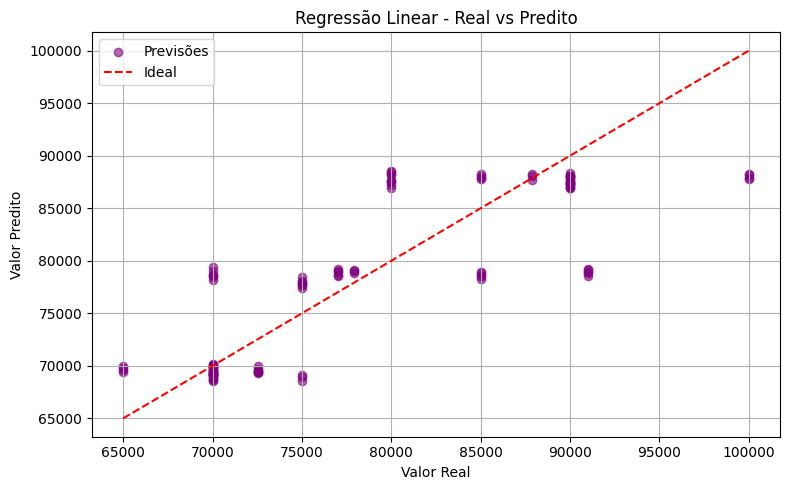

In [61]:
# Regressão Linear

logreg = LinearRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)

# Resultados
ScoreRL = r2_score(y_test, y_pred_logreg)
print("Acurácia Regressão Logística:", ScoreRL)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_logreg))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_logreg))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_logreg) / y_test)) * 100)

# Armazena valor
modelos ['Regressão Logística'] = ScoreRL

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_logreg, alpha=0.6, color='purple', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Regressão Linear - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Acurácia KNN: 0.7026502506593162
Erro médio absoluto: 3059.17037037037
Raiz do erro quadrático médio (RMSE): 24789861.354074072
Erro percentual médio absoluto (MAPE): 3.8821607844475996




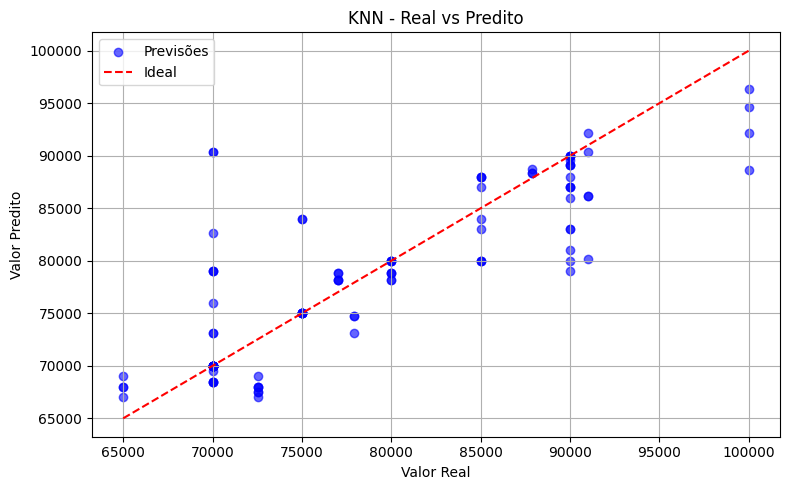

In [62]:
# KNN - 5 vizinhos

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Resultados
ScoreKNN = r2_score(y_test, y_pred_knn)
print("Acurácia KNN:", ScoreKNN)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_knn))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_knn))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100)

# Armazena valor
modelos ['KNN'] = ScoreKNN

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='blue', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("KNN - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Acurácia SVM (RBF): -0.18980207147336658
Erro médio absoluto: 7913.038267084398
Raiz do erro quadrático médio (RMSE): 99193049.45107393
Erro percentual médio absoluto (MAPE): 9.490638132400672




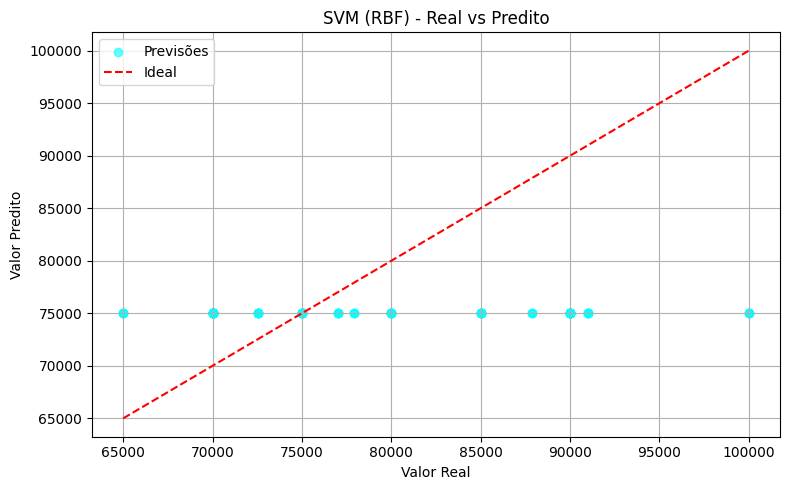

In [63]:
# SVM com kernel RBF -> mais complexo

svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(x_test)

# Resultados
ScoreSVM_RBF = r2_score(y_test, y_pred_svm_rbf)
print("Acurácia SVM (RBF):", ScoreSVM_RBF)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_rbf))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_svm_rbf))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_svm_rbf) / y_test)) * 100)

# Armazena valor
modelos ['SVM (RBF)'] = ScoreSVM_RBF

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svm_rbf, alpha=0.6, color='cyan', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("SVM (RBF) - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Acurácia SVM (Polinomial): -0.18725674829309313
Erro médio absoluto: 7911.196022183717
Raiz do erro quadrático médio (RMSE): 98980847.46038722
Erro percentual médio absoluto (MAPE): 9.491790929766587




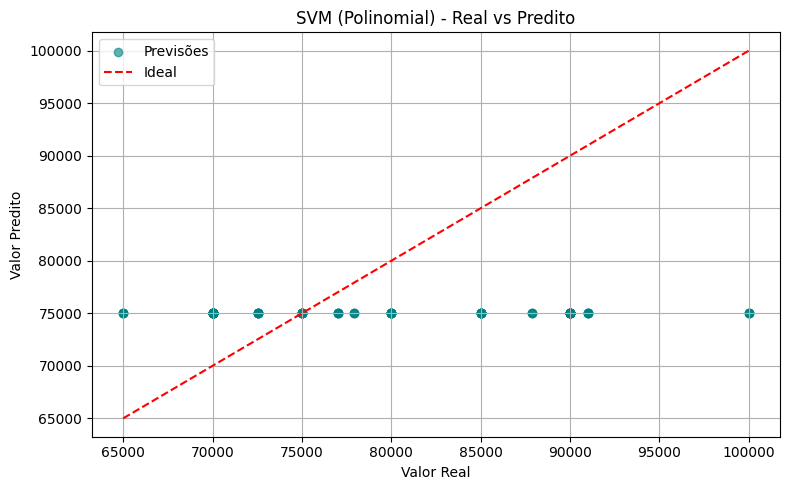

In [64]:
# SVM com kernel polinomial -> intermediário

svm_poly = SVR(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_svm_poly = svm_poly.predict(x_test)

# Resultados
ScoreSVM_P = r2_score(y_test, y_pred_svm_poly)
print("Acurácia SVM (Polinomial):", ScoreSVM_P )
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_poly))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_svm_poly))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_svm_poly) / y_test)) * 100)

# Armazena valor
modelos ['SVM (Polinomial)'] = ScoreSVM_P

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svm_poly, alpha=0.6, color='teal', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("SVM (Polinomial) - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# # SVM com kernel linear -> o mais simples

# svm_linear = SVR(kernel='linear')
# svm_linear.fit(x_train, y_train)
# y_pred_svm_linear = svm_linear.predict(x_test)

# # Resultados
# ScoreSVM_L = r2_score(y_test, y_pred_svm_linear)
# print("Acurácia SVM (Linear):", ScoreSVM_L)
# print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_svm_linear))
# print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_svm_linear))
# print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_svm_linear) / y_test)) * 100)

# # Armazena valor
# modelos ['SVM (Linear)'] = ScoreSVM_L

# # Gráfico
# print('\n')
# plt.figure(figsize=(8, 5))
# plt.scatter(y_test, y_pred_svm_linear, alpha=0.6, color='gray', label='Previsões')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
# plt.xlabel("Valor Real")
# plt.ylabel("Valor Predito")
# plt.title("SVM (Linear) - Real vs Predito")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

Acurácia Decision Tree: 0.9558715172891095
Erro médio absoluto: 558.074074074074
Raiz do erro quadrático médio (RMSE): 3678963.814814815
Erro percentual médio absoluto (MAPE): 0.791691266977891




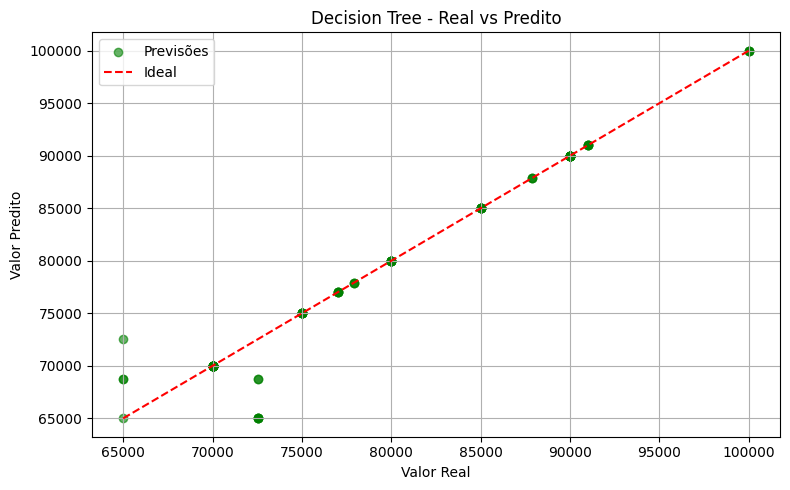

In [66]:
# Decision Tree

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Resultados
ScoreDT = r2_score(y_test, y_pred_dt)
print("Acurácia Decision Tree:", ScoreDT)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_dt))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_dt))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100)

# Armazena valor
modelos ['Decision Tree'] = ScoreDT

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='green', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Decision Tree - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Acurácia Random Forest: 0.9633683549977693
Erro médio absoluto: 576.0081922398589
Raiz do erro quadrático médio (RMSE): 3053957.175987145
Erro percentual médio absoluto (MAPE): 0.8189726213223302




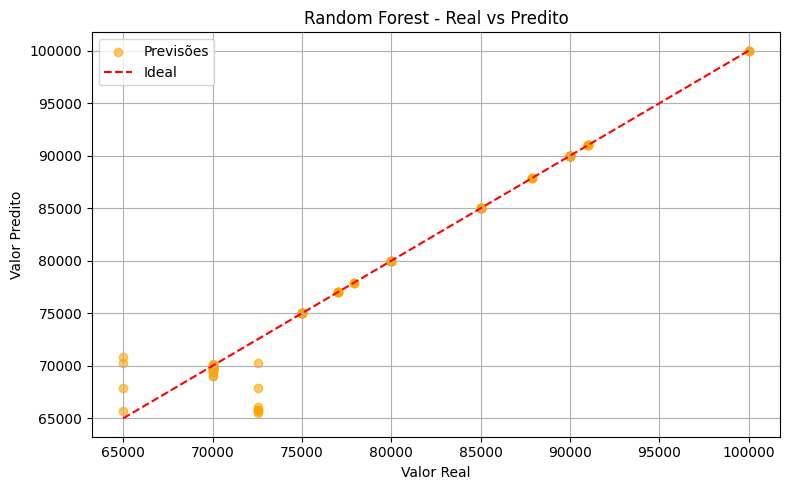

In [67]:
# Random Forest

rf = RandomForestRegressor(n_estimators=25)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# Resultados
ScoreRFO = r2_score(y_test, y_pred_rf)
print("Acurácia Random Forest:", ScoreRFO)
print("Erro médio absoluto:",mean_absolute_error(y_test, y_pred_rf))
print("Raiz do erro quadrático médio (RMSE):", mean_squared_error(y_test, y_pred_rf))
print("Erro percentual médio absoluto (MAPE):", np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100)

# Armazena valor
modelos ['Random Forest'] = ScoreRFO

# Gráfico
print('\n')
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange', label='Previsões')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Random Forest - Real vs Predito")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
# CONCLUSÃO

# Gerar o ranking das acurácias
ranking = sorted(modelos.items(), key=lambda x: x[1], reverse=True)

# Exibir o ranking
print("Ranking dos Mellhores Modelos:\n")
for i, (model, accuracy) in enumerate(ranking, 1):
    print("{}. {}: {:.4f}".format(i, model, accuracy))


Ranking dos Mellhores Modelos:

1. Random Forest: 0.9634
2. Decision Tree: 0.9559
3. KNN: 0.7027
4. Regressão Logística: 0.6647
5. SVM (Polinomial): -0.1873
6. SVM (RBF): -0.1898
